In [61]:
from google.colab import drive
drive.mount('/content/drive')

import json
with open("/content/drive/MyDrive/Colab Notebooks/retort_review_automation/data/sample_json.json", 'r') as file:
    chunk = json.load(file)
    doc = chunk['chunk_content']
print(doc)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Set up### Retrieve key and endpointTo successfully make a call against Azure OpenAI, you need an endpoint and a key.|Variable name | Value ||--------------------------|-------------|| `AZURE_OPENAI_ENDPOINT`               | This value can be found in the Keys & Endpoint section when examining your resource from the Azure portal. Alternatively, you can find the value in the Azure OpenAI Studio > Playground > Code View. An example endpoint is: `https://aoai-docs.openai.azure.com/`.|| `AZURE_OPENAI_API_KEY` | This value can be found in the Keys & Endpoint section when examining your resource from the Azure portal. You can use either `KEY1` or `KEY2`.|Go to your resource in the Azure portal. The Endpoint and Keys can be found in the Resource Management section. Copy your endpoint and access key as you need both for authenticating your API calls. You can use eithe

# <mark> Using TF-IDF

Advantages of TF-IDF

- **Simplicity:** TF-IDF is easy to understand and implement. It provides a straightforward way to quantify the importance of a term in a document relative to a collection of documents.
Relevance: By weighing terms based on their frequency in a document and their rarity across a corpus, TF-IDF helps identify the most relevant terms for a given document.
- **Dimensionality Reduction:** TF-IDF can help reduce dimensionality by filtering out common words (stop words), allowing for more efficient processing in downstream tasks like clustering or classification.
- **Effectiveness in Information Retrieval:** It is effective in search engines and document retrieval systems, as it helps rank documents based on their relevance to a search query.
- **No Assumption of Data Distribution:** TF-IDF does not assume any specific distribution of data, making it versatile across various types of text data.

Disadvantages of TF-IDF

- **Context Ignorance:** TF-IDF does not consider the context in which terms appear. Words with multiple meanings (polysemy) or synonyms may be treated as separate entities, leading to potential misinterpretation.
- **Document Length Sensitivity:** Longer documents may have higher term frequencies, which can skew the importance of terms. This can affect comparisons between documents of varying lengths.
- **Lack of Semantic Understanding:** TF-IDF does not capture the semantic meaning of words or phrases, which can limit its effectiveness in understanding the content of documents.
- **Sparse Representation:** The resulting vectors can be very sparse, especially in large corpora, which can make them less efficient for certain machine learning algorithms.
- **Static Representation:** TF-IDF generates static representations of documents, which may not adapt well to changes in language or usage over time.

@TF-IDF can not be used as skill for chunk enrichment in this usecase, becuase important keywords are determined by TF-IDF based on the frequency of words appeared in a particular document in relation to other documents.

TF-IDF vectorizes/scores a word by multiplying the word’s Term Frequency (TF) with the Inverse Document Frequency (IDF).

**Term Frequency:** TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.
Normalization:Purpose: TF represents the frequency of a term in a document. Longer documents tend to have higher TF values simply because they contain more words. This can bias the results towards longer documents.

Normalization Technique: To address this issue, TF is often normalized by dividing it by the total number of terms in the document (document length normalization). This results in a normalized TF value, which is a relative measure of how often a term occurs in the document, regardless of document length.Formula: Normalized TF = (Frequency of Term in Document) / (Total Number of Terms in Document)

**Inverse Document Frequency:** IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

TF-IDF is useful in many natural language processing applications. For example, Search Engines use TF-IDF to rank the relevance of a document for a query. TF-IDF is also employed in text classification, text summarization, and topic modeling.

Note that there are some different approaches to calculating the IDF score. The base 10 logarithm is often used in the calculation. However, some libraries use a natural logarithm. In addition, one can be added to the denominator as follows in order to avoid division by zero. Inverse document frequency, .means the word most uncommon will carry highest weight. Word that is common everywhere contains no significance. It is derived from the concept of entropy in information theory. So log formula gives the higher value for a smaller fraction.


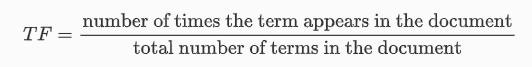

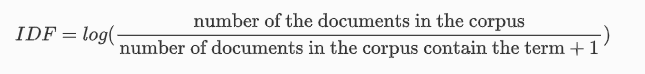

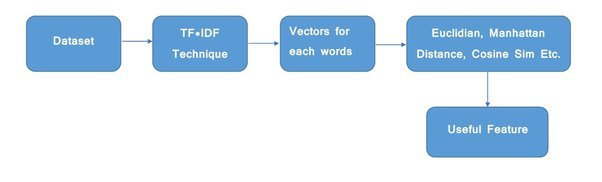

Imagine the term appears 20 times in a document that contains a total of 100 words. Term Frequency (TF) of can be calculated as follow:

  TF = 20/100 = 0.2

Assume a collection of related documents contains 10,000 documents. If 100
documents out of 10,000 documents contain the term, Inverse Document Frequency (IDF) of can be calculated as follows

  IDF = log(1000/100) = 2

Using these two quantities, we can calculate TF-IDF score of the term for the document.

  TF-IDF = 0.2 x 2 = 0.4

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['data science is one of the most important fields of science',
          'this is one of the best data science courses',
          'data scientists analyze data' ]

tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (3, 14)


In [5]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0.         0.         0.         0.18952581 0.32089509 0.32089509
  0.24404899 0.32089509 0.48809797 0.24404899 0.48809797 0.
  0.24404899 0.        ]
 [0.         0.40029393 0.40029393 0.23642005 0.         0.
  0.30443385 0.         0.30443385 0.30443385 0.30443385 0.
  0.30443385 0.40029393]
 [0.54270061 0.         0.         0.64105545 0.         0.
  0.         0.         0.         0.         0.         0.54270061
  0.         0.        ]]


In [7]:
words_set = tr_idf_model.get_feature_names_out()

print(words_set)

['analyze' 'best' 'courses' 'data' 'fields' 'important' 'is' 'most' 'of'
 'one' 'science' 'scientists' 'the' 'this']


In [8]:
import pandas as pd
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)

df_tf_idf

,analyze,best,courses,data,fields,important,is,most,of,one,science,scientists,the,this
0,0.000000,0.000000,0.000000,0.189526,0.320895,0.320895,0.244049,0.320895,0.488098,0.244049,0.488098,0.000000,0.244049,0.000000
1,0.000000,0.400294,0.400294,0.236420,0.000000,0.000000,0.304434,0.000000,0.304434,0.304434,0.304434,0.000000,0.304434,0.400294
2,0.542701,0.000000,0.000000,0.641055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542701,0.000000,0.000000


# <mark> Using KeyBERT

 -  https://maartengr.github.io/KeyBERT/api/keybert.html
 -  https://github.com/MaartenGr/KeyBERT
 -  https://jaketae.github.io/study/keyword-extraction/
 -  https://towardsdatascience.com/enhancing-keybert-keyword-extraction-results-with-keyphrasevectorizers-3796fa93f4db
 -  https://www.sbert.net/docs/sentence_transformer/training_overview.html
 -  https://www.kaggle.com/code/danieldorosz/bert-feature-extraction-and-fine-tuning

A minimal method for keyword extraction with BERT
The keyword extraction is done by finding the sub-phrases in a document that are the most similar to the document itself.
First, document embeddings are extracted with BERT to get a document-level representation. Then, word embeddings are extracted for N-gram words/phrases.
Finally, we use cosine similarity to find the words/phrases that are the most similar to the document.
The most similar words could then be identified as the words that best describe the entire document.



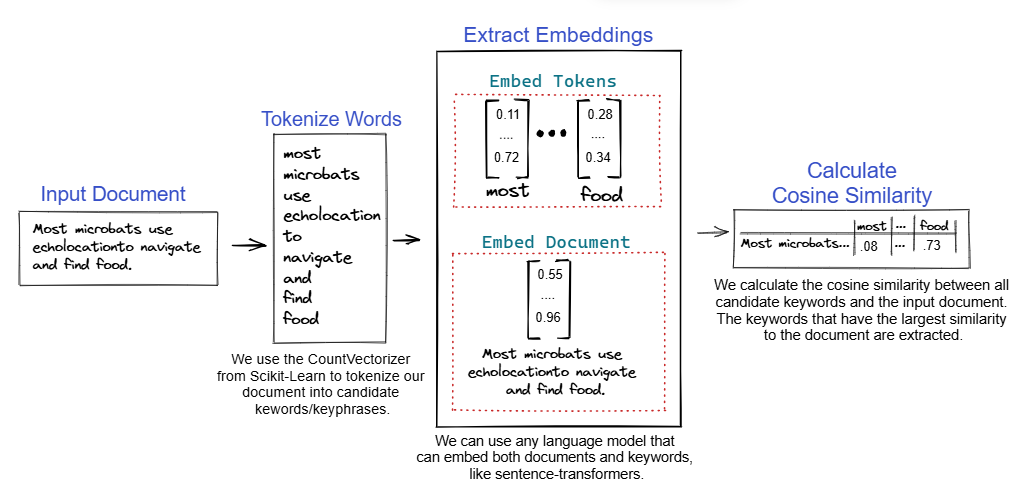

**Maximal Marginal Relevance**
Calculate Maximal Marginal Relevance (MMR) between candidate keywords and the document.

MMR considers the similarity of keywords/keyphrases with the document, along with the similarity of already selected keywords and keyphrases. This results in a selection of keywords that maximize their within diversity with respect to the document.

**Max Sum Distance**
Calculate Max Sum Distance for extraction of keywords

We take the 2 x top_n most similar words/phrases to the document. Then, we take all top_n combinations from the 2 x top_n words and extract the combination that are the least similar to each other by cosine similarity.

This is O(n^2) and therefore not advised if you use a large top_n

In [62]:
!pip install -qU keybert

In [63]:
doc1 = '''
Motion claims to increase productivity by 137% with automation and AI that “intelligently plan your day, schedule meetings,
and build the perfect to-do list.” How? It focuses on time management and project coordination as its main functions,
enabling users to manage schedules and tasks. Integration is central to its design as it automates workflow
by bringing in other productivity platforms — Google calendar, Zoom, Gmail, Google Meet, Microsoft Outlook,
iCloud Calendar and Siri — and providing insights about daily goals. It’s for those “who have too much to do in too little time”
and can “automatically turn overwhelming task lists into a concrete plan. It also has a deadline tracking feature which alerts you
when things might miss the deadline. As it uses the inputs from one’s tasks, such as deadline, priority, and duration,
it schedules them into available time. One can divide the tasks into blocks and specify the shortest amount of time
for each which one can manoeuver if something requires more time.Once fed the data, it appears on calendars as prioritised.
However, one can also reorder them later.
'''

doc2 = "The food was delicious and the staff were wonderful."

In [64]:
from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc1, top_n=10)
keywords

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[('schedules', 0.4972),
 ('calendar', 0.4107),
 ('calendars', 0.4057),
 ('tasks', 0.4054),
 ('schedule', 0.4007),
 ('automates', 0.3867),
 ('automation', 0.3796),
 ('deadline', 0.3778),
 ('coordination', 0.3702),
 ('productivity', 0.3489)]

In [65]:
kw_model.extract_keywords(doc2, top_n=2)

[('staff', 0.5041), ('delicious', 0.3398)]

In [66]:
kw_model.extract_keywords(doc, top_n=5)

[('azure_openai_endpoint', 0.8005),
 ('azure_openai_api_key', 0.7966),
 ('openai', 0.4348),
 ('aoai', 0.4259),
 ('azure', 0.4211)]

# <mark> Using RAKE

- https://github.com/aneesha/RAKE/blob/master/rake.py

## How RAKE Algorithm Works?

The RAKE algorithm efficiently extracts keywords through a multi-step process.

1. It leverages a predefined list of stop words acting as delimiters to isolate potentially relevant terms.
2. Stop words, like "the" or "and," provide context but hold little meaning individually.
3. RAKE then divides the text based on these stop words and phrase delimiters, creating candidate keywords – phrases that might be significant.
Next, RAKE constructs a table that captures how frequently words co-occur within these candidate keywords. Words appearing together often suggest thematic relevance.
4. The algorithm assigns scores to each keyword based on their co-occurrence frequency. Words frequently appearing alongside others likely hold more value and receive higher scores.
5. Finally, RAKE identifies key phrases by looking for co-occurring keywords that appear together more than twice, regardless of intervening stop words. The multi-word terms are then scored similarly to single keywords.
6. In the final step, RAKE selects a predefined number (T) of keywords or keyphrases with the highest scores, delivering a concise set of terms that best represent the document's content.

Effective RAKE implementation relies heavily on preprocessed text data. Raw text often contains extraneous information that can hinder keyword extraction. Preprocessing techniques prepare the data by removing noise and inconsistencies, allowing RAKE to focus on the most relevant terms.

Preprocessing involves data cleaning steps like removing special characters, punctuation, and HTML tags (if applicable). It ensures RAKE focuses on the core content. Common preprocessing steps include data cleaning, tokenization, and normalization.

Tokenization: This breaks the text into individual words or phrases, the basic units for RAKE analysis. For instance, the sentence "Machine learning thrives on data" would be tokenized into ["Machine," "learning," "thrives," "on," "data"].
Normalization: It addresses inconsistencies like converting all letters to lowercase or stemming words to their root form (e.g., "running" becomes "run"). It ensures RAKE treats relevant variations identically.

In [45]:
!pip install rake_nltk

In [53]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [56]:
import nltk
from rake_nltk import Rake

text = doc.lower()
stop_words = nltk.corpus.stopwords.words('english')

rake_extracter = Rake(stopwords=stop_words)

rake_extracter.extract_keywords_from_text(text)

print(rake_extracter.get_ranked_phrases())

['user \')```# bash ``` bashecho export azure_openai_api_key =" replace_with_your_key_value_here', 'environment `````` bashecho export azure_openai_endpoint =" replace_with_your_endpoint_here', 'environment ```---[! include rest api quickstart', "environment ]:: setenvironmentvariable (' azure_openai_api_key ',", "environment ]:: setenvironmentvariable (' azure_openai_endpoint ',", 'command line ``` cmdsetx azure_openai_api_key', '::: image type =" content', 'access keys location highlighted ."', '```# powershell ``` powershell', 'assign persistent environment variables', 'regenerate keys without causing', 'key .| variable name', 'endpoint .### environment variables', '`````` cmdsetx azure_openai_endpoint', "user ')`````` powershell", 'text =" screenshot', 'source =" media', 'lightbox =" media', 'environment && source', 'environment && source', 'https :// aoai', 'endpointto successfully make', 'two keys allows', 'key2 `.| go', '### retrieve key', "replace_with_your_key_value_here ',", 

In [58]:
print(rake_extracter.get_ranked_phrases_with_scores())

[(60.25, 'user \')```# bash ``` bashecho export azure_openai_api_key =" replace_with_your_key_value_here'), (38.458333333333336, 'environment `````` bashecho export azure_openai_endpoint =" replace_with_your_endpoint_here'), (32.875, 'environment ```---[! include rest api quickstart'), (32.125, "environment ]:: setenvironmentvariable (' azure_openai_api_key ',"), (31.125, "environment ]:: setenvironmentvariable (' azure_openai_endpoint ',"), (25.25, 'command line ``` cmdsetx azure_openai_api_key'), (25.0, '::: image type =" content'), (21.0, 'access keys location highlighted ."'), (17.333333333333332, '```# powershell ``` powershell'), (16.875, 'assign persistent environment variables'), (14.5, 'regenerate keys without causing'), (14.5, 'key .| variable name'), (14.475, 'endpoint .### environment variables'), (13.25, '`````` cmdsetx azure_openai_endpoint'), (12.666666666666666, "user ')`````` powershell"), (11.0, 'text =" screenshot'), (11.0, 'source =" media'), (11.0, 'lightbox =" med

# <mark> Using YAKE (Yet Another Keyword Extractor)

- https://github.com/LIAAD/yake

YAKE! is a light-weight unsupervised automatic keyword extraction method which rests on text statistical features extracted from single documents to select the most important keywords of a text. The system does not need to be trained on a particular set of documents, neither it depends on dictionaries, external-corpus, size of the text, language or domain.

Developers compared it against ten state-of-the-art unsupervised approaches (TF.IDF, KP-Miner, RAKE, TextRank, SingleRank, ExpandRank, TopicRank, TopicalPageRank, PositionRank and MultipartiteRank), and one supervised method (KEA). Experimental results carried out on top of twenty datasets (see Benchmark section below) show that YAKE methods significantly outperform state-of-the-art methods under a number of collections of different sizes, languages or domains.

Main Features
- Unsupervised approach
- Corpus-Independent
- Domain and Language Independent
- Single-Document

# How YAKE Works
YAKE tackles keyword extraction through a multi-step process that analyzes the text without relying on external resources:

1. **Text Preprocessing**
YAKE begins by preparing the text for analysis. It breaks the text into individual terms, separating words based on spaces, punctuation marks, or line breaks. For instance, when YAKE processes the sentence "Natural Language Processing (NLP) is a field of Artificial Intelligence...", it breaks it down into single words such as "Natural," "Language," "Processing," and so on.  

2. **Feature Extraction**
YAKE goes deeper than identifying terms by extracting five key features for each word to assess its significance:

- Casing: YAKE takes into account whether a word is in uppercase or lowercase. For instance, "Machine" might be less indicative than "MACHINE LEARNING," suggesting the latter could be a keyword.
- Word Positional: YAKE assigns a higher score to words appearing earlier in the text. In the above example sentence, "Natural Language Processing" might score higher than "Artificial Intelligence" due to its position.
- Word Frequency: Words appearing more frequently receive a higher score. "The" would likely score low due to its frequency, while "Intelligence" might score higher.
- Word Relatedness to Context: YAKE analyzes how many different words surround a candidate keyword. Consider "learning": If it co-occurs with many unique words (e.g., "machine," "deep," "supervised"), it might be less meaningful than "machine learning," which appears together frequently.
- Word DifSentence: This assesses how often a word appears in different sentences. Words found in multiple sentences (e.g., "intelligence") are considered more relevant than those restricted to one sentence (e.g., "a").

3. **Scoring and Candidate Generation**
YAKE keyword extraction combines these features into a single score for each term and each candidate phrase (1-grams, 2-grams, and 3-grams). Lower scores indicate potentially more relevant keywords.  

4. **Data Deduplication and Ranking**
YAKE removes duplicates and ranks the remaining keywords based on their scores. It provides a final list of the most relevant keywords and key phrases, summarizing the document's content.

YAKE analyzes the text's structure, word usage, and co-occurrence patterns to identify the most informative keywords representing the document's content.

# YAKE vs. Other Keyword Extraction Methods
While YAKE offers a powerful approach, it is valuable to compare it with other keyword extraction techniques:

**Traditional Methods**

- Advantages: Traditional methods like TF-IDF and RAKE are often simpler and computationally less expensive. TF-IDF, for instance, focuses on word frequency within a document and across a corpus, offering a clear interpretable score.

- Limitations: They can be influenced heavily by document length and may struggle with context or identifying multi-word phrases. Relying on pre-built dictionaries or corpora might limit their adaptability to new domains or languages.

**Advantages of YAKE Keyword Extraction**

- Unsupervised Approach: YAKE's unsupervised nature eliminates the need for training data or external resources.
- Focus on Text Features: Analyzing features within the text allows YAKE to capture context-specific keywords and potentially identify emerging terminology not yet established in external resources.

**Limitations of YAKE Keyword Extraction**

- Context Ambiguity: YAKE's reliance on local text statistics can make it susceptible to ambiguity and context dependency. Complexities in natural language can still pose challenges in accurately identifying the most relevant keywords, particularly in very short or very long documents.
- Multi-word Phrase Identification: While YAKE considers n-grams, identifying highly specialized multi-word phrases might be less efficient compared to methods that leverage domain-specific knowledge.
- YAKE keyword extraction balances efficiency and adaptability, making it a strong choice for many NLP tasks. However, traditional methods like TF-IDF might be preferred for situations requiring maximum interpretability or dealing with highly specialized domains.

YAKE Implementation and Examples

- Automatic Document Summarization: YAKE helps create concise summaries that capture the essence of a document by identifying key terms. In a lengthy research paper, YAKE can extract keywords like "gene editing", "ethical implications", and "potential benefits", aiding in summarizing the paper's core themes.
- Information Retrieval: YAKE can improve search engine functionality. When a user enters a query, YAKE can extract relevant keywords from the indexed documents, allowing for more accurate retrieval of documents matching the user's intent.

In [9]:
!pip install yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.4 MB/s eta 0:00:00


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import json
with open("/content/drive/MyDrive/Colab Notebooks/retort_review_automation/data/sample_json.json", 'r') as file:
    chunk = json.load(file)
    doc = chunk['chunk_content']
print(doc)

Set up### Retrieve key and endpointTo successfully make a call against Azure OpenAI, you need an endpoint and a key.|Variable name | Value ||--------------------------|-------------|| `AZURE_OPENAI_ENDPOINT`               | This value can be found in the Keys & Endpoint section when examining your resource from the Azure portal. Alternatively, you can find the value in the Azure OpenAI Studio > Playground > Code View. An example endpoint is: `https://aoai-docs.openai.azure.com/`.|| `AZURE_OPENAI_API_KEY` | This value can be found in the Keys & Endpoint section when examining your resource from the Azure portal. You can use either `KEY1` or `KEY2`.|Go to your resource in the Azure portal. The Endpoint and Keys can be found in the Resource Management section. Copy your endpoint and access key as you need both for authenticating your API calls. You can use either `KEY1` or `KEY2`. Always having two keys allows you to securely rotate and regenerate keys without causing a service disruption

In [12]:
from yake import KeywordExtractor
extractor = KeywordExtractor()

text = "This is a sample document about natural language processing (NLP)."
keywords = extractor.extract_keywords(text)
print(keywords[:3])

[('natural language processing', 0.016559150827736194), ('NLP', 0.030396371632413578), ('language processing', 0.04940384002065631)]


In [60]:
keywords = extractor.extract_keywords(doc)
print(keywords)

[('Azure OpenAI Studio', 0.006793435496673474), ('Azure OpenAI', 0.009988377193036054), ('Azure', 0.010952764464172381), ('Azure OpenAI resource', 0.011708538756115144), ('OpenAI', 0.01609852083813213), ('Azure portal', 0.019070469956200372), ('endpoint', 0.021160569919268485), ('Retrieve key', 0.026369418728051618), ('endpointTo successfully make', 0.027876482529818548), ('Bashecho export AZURE', 0.02976045920079176), ('REPLACE', 0.03329538331734746), ('key', 0.03560713901836774), ('OpenAI Studio', 0.03913032573959823), ('Code View', 0.04736158294505116), ('API', 0.05019268708563617), ('Keys', 0.05934523169727957), ('CMDsetx AZURE', 0.06102447399453456), ('export AZURE', 0.06363076073810145), ('OpenAI resource', 0.06622811695344108), ('resource', 0.07015257432526215)]


# <mark> Using LLM

# <mark> Using Azure AI Language